In [1]:
%cd bci_eeg/courses/signal_processing/2.spectral_analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile

A:\AI\bci_eeg\courses\signal_processing\2.spectral_analysis


, (450879, 2)
44100
(129,)
(129, 2012)
(2012,)


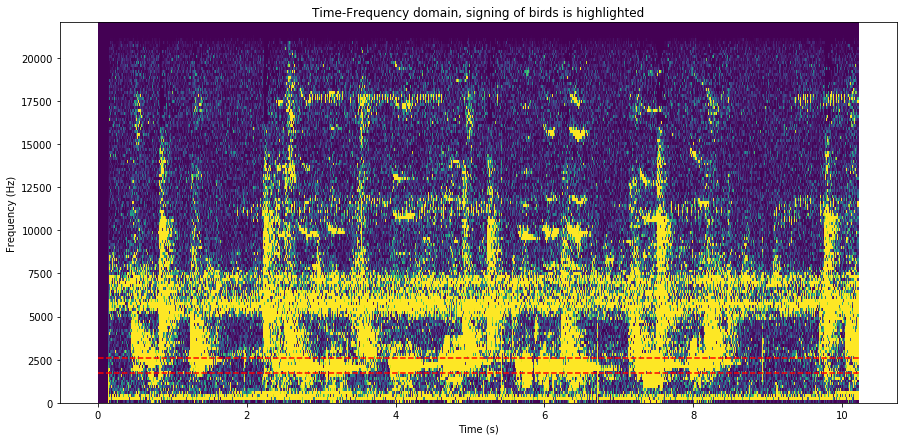

In [7]:
sample_freq, bird_signal = scipy.io.wavfile.read('bird_singing.wav')
bird_signal_chann1 = bird_signal[:, 0]
bird_signal_chann2 = bird_signal[:, 1]
print(',', bird_signal.shape)
bird_time = np.arange(0, len(bird_signal)) / sample_freq

birds_singing_frq = [1700, 2600]

frequencies, times, power = scipy.signal.spectrogram(bird_signal_chann1, sample_freq)
print(sample_freq)
print(frequencies.shape)
print(power.shape)
print(times.shape)
plt.figure(figsize=(15, 7))
plt.pcolormesh(times, frequencies, power, vmin=0, vmax=9)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Time-Frequency domain, signing of birds is highlighted')
plt.plot([0, len(bird_signal_chann1) / sample_freq], [birds_singing_frq[0], birds_singing_frq[0]], 'r--')
plt.plot([0, len(bird_signal_chann1) / sample_freq], [birds_singing_frq[1], birds_singing_frq[1]], 'r--')
plt.show()


In [37]:
# Filtering 
filtered_signal = np.zeros((2, len(bird_signal)))
filtered_signal[:, :] = bird_signal.T

for chan_i in range(2):
    order = round(10 * (sample_freq / birds_singing_frq[0]))
    order += ~order % 2
    filtering_kernel = signal.firwin(order, birds_singing_frq[0], fs=sample_freq, pass_zero=False)
    filtered_signal[chan_i, :] = signal.filtfilt(filtering_kernel, 1, filtered_signal[chan_i, :])
    
    order = round(10 * (sample_freq / birds_singing_frq[1]))
    order += ~order % 2
    filtering_kernel = signal.firwin(order, birds_singing_frq[1], fs=sample_freq, pass_zero=True)
    filtered_signal[chan_i, :] = signal.filtfilt(filtering_kernel, 1, filtered_signal[chan_i, :])



Text(0.5, 1.0, 'Time-Frequency of filtered singing of birds')

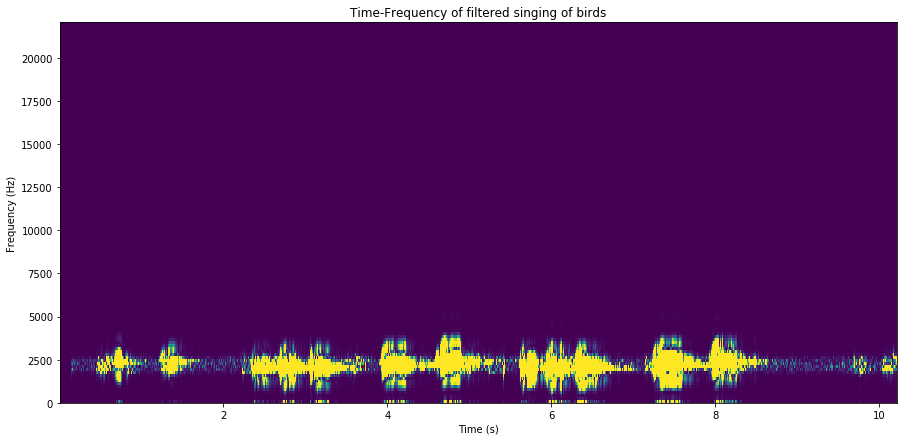

In [38]:
frequencies, times, power = scipy.signal.spectrogram(filtered_signal[0, :], sample_freq)
plt.figure(figsize=(15, 7))
plt.pcolormesh(times, frequencies, power, vmin=0, vmax=9)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.title('Time-Frequency of filtered singing of birds')